In [1]:
#Loading libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
#Read date columns using parse_dates
marketing = pd.read_csv('marketing.csv',parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [3]:
#Checking data types and missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


Columns 'converted' and 'is_retained' have True/False values. Let's convert them to boolean format

In [4]:
#Changing data type
marketing.converted=marketing.converted.astype('bool')
marketing.is_retained=marketing.is_retained.astype('bool')

In [5]:
#Summary Statistics
marketing.describe()

/var/folders/48/kshcls710bv2dlds_cd1v6480000gp/T/ipykernel_58445/171906178.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10037,10037,10037,10037,1856,577,1856,10037
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,9460
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


To begin, let's get a sense of how many unique users see our marketing assets each day.

In [6]:
# Aggregate unique users that see ads by date
daily_users = marketing.groupby(['date_served'])['user_id'].nunique() 
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

Looks like about 300 users each day see our ads. Let's visualise it.

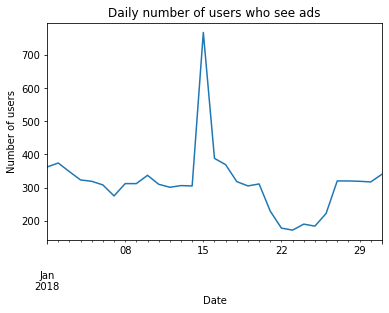

In [7]:
# Plot
daily_users.plot()
# Annotation
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()


As you can see, while the first half of the month sticks around 300 users per day, there's a huge spike in the middle of the month. This may be because a big marketing email was sent out, which reached many users who are not daily visitors of the site. These are the kinds of fluctuations we want to be aware of before diving in.

Marketing metrics we will use:

1. Conversion rate is the percentage of people that we market to who ultimately convert to our product.

Conversion rate= Total number of people subscribed/Number of people who convert

2. Retention rate is the percentage of people that remain subscribed after a certain period of time. 

Retention rate=Total number of people who converted/Number of people who remain subscribed



In [11]:
# Calculating Conversion Rate

# Calculate the number of subscribers
subscribers = marketing[marketing.converted==True].user_id.nunique()

# total #users 
total = marketing['user_id'].nunique()

conv_rate = subscribers/total
print(round(conv_rate*100, 2), '%')

14.09 %


In [12]:
# Calculate the number of people who remained subscribed
retained = marketing[marketing.is_retained==True].user_id.nunique()

# Calculate the retention rate
retention_rate = retained/subscribers

print(round(retention_rate*100, 2), "%")

676.41 %


In addition to high-level metrics, it's important to segment customers by who you're marketing to. Segmenting means breaking down metrics by specific characteristics. For instance, in addition to looking at conversion rates overall, you might also want to look at conversion rate by age group. It's possible that a campaign had a low conversion rate overall, but was super effective for users who were 55 years and up.

One way to segment is by subscribing channel. Let's check the retention rate for users who converted by clicking on a House Ad. 

In [13]:
# Subset to include only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']

retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()

retention_rate = retained/subscribers

print(round(retention_rate*100,2), '%')

58.05 %


In [14]:
#Calculating retention rate by all subscribing channels

# Retained customers across channels
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
retained

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [15]:
# Subscribers in channels
subscribers=marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
subscribers

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [16]:
#Retention rate by all subscribing channels
channel_retention_rate=retained/subscribers
print(round(channel_retention_rate*100,2), '%')

subscribing_channel
Email        87.58
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64 %


It appears email has the highest retention rate among our marketing channels.

### Comparing language conversion rates

Let's look at the conversion rate by the language that the marketing asset was shown in. While many of users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

In [17]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing.converted==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
language_conversion_rate

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64

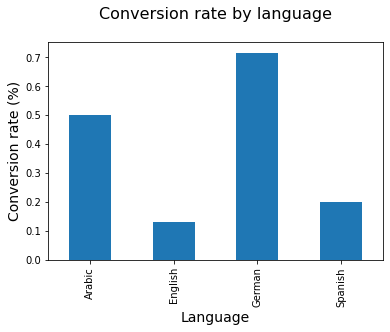

In [19]:
# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind = 'bar')
# Add a title and x and y-axis labels 
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
# Display the plot
plt.show()


Arabic and German have the highest conversion rates. 

Is there any difference in the conversion rate based on when in the month, users saw an ad?

In [18]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count subscribers
subscribers = marketing[marketing.converted==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
daily_conversion_rate

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64

In [20]:
# Group by date_subscribed and count unique users
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()

# Group by date_subscribed and sum conversions
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()

# Calculate subscriber quality across dates
daily_retention_rate = retained/total
daily_retention_rate

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64

Let's plot this data. But before we need to do some preparations

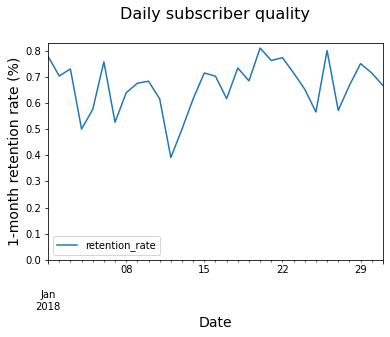

In [21]:
# Reset index to turn the Series into a DataFrame
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
# Rename columns
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot('date_subscribed', 'retention_rate')
# Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size = 14)
# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()


There is a drop in retention rate around 11 Jan. Let's count the number of users for each preferred language on each date.

In [22]:
language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
#Unstack
language=pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


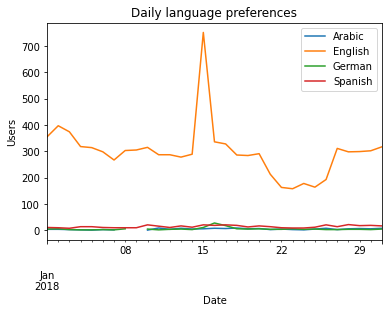

In [23]:
#Plotting preferred language over time
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right',labels = language.columns.values)
plt.show()


It's obvious that English is the most preferred language. Let's see how it works among different age groups.
#### Language preferences across age groups

In [24]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred','age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
language_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


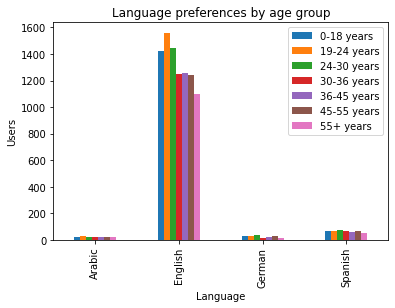

In [25]:
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right',labels = language_age.columns.values)
plt.show()


#### Marketing channels across age groups
Let's see if marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

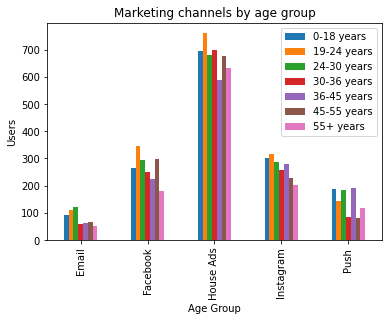

In [26]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

As you can see, email is not reaching older age groups.

#### Analyzing campaigns
Let's determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

In [27]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()
retention_total

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                6
                 House Ads               6
                 Instagram               3
                 Push                    2
Name: user_id, Length: 155, dtype: int64

In [28]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing.is_retained==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
retention_subs.head()

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64

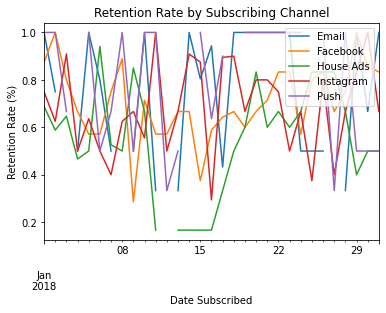

In [29]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.show()

Let's divide this plot for better result

In [30]:
#Retention function
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention    
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    # Group by column_names and calculate conversion    
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()    
    retention_rate = retained/converted
    return retention_rate

#Conversion rate function
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe.converted==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

#Plotting retention rate function
def plotting(dataframe):
    for column in dataframe:        
        plt.plot(dataframe.index, dataframe[column])        
        plt.title('Daily ' + column + ' retention rate\n',size = 16)       
        plt.ylabel('Retention rate (%)', size = 14)        
        plt.xlabel('Date', size = 14)   
        plt.xticks(rotation=90)

        plt.show()

#Conversion rate's plotting function        
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index,dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=90)
        # Show plot
        plt.show()  
        plt.clf()

#Retention rate by channel
daily_retention = retention_rate(marketing,['date_subscribed', 'subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
daily_retention.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,1.00,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


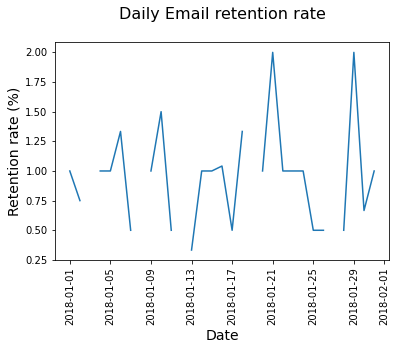

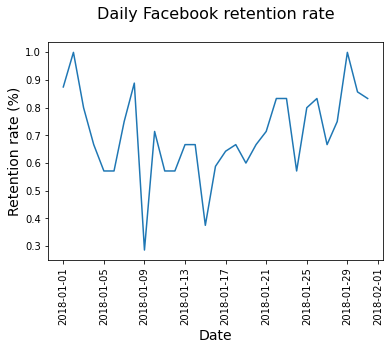

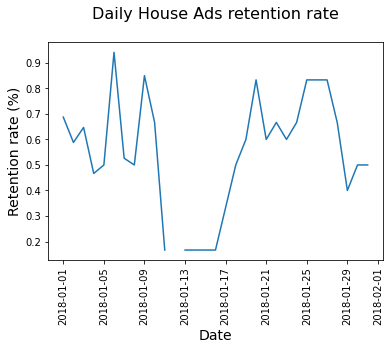

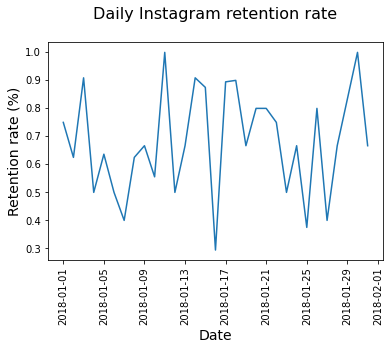

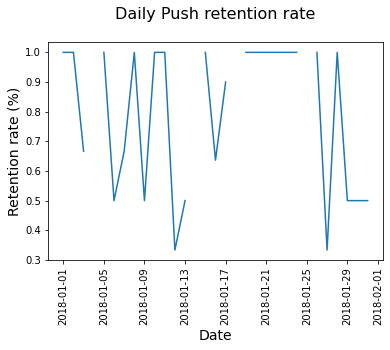

In [31]:
plotting(daily_retention)

You can see email has big spikes that often go down to 0. This is common because emails are typically sent in bulk leading users to subscribe on the same set of limited days. When retention rate is 0, this means no one subscribed on those days.

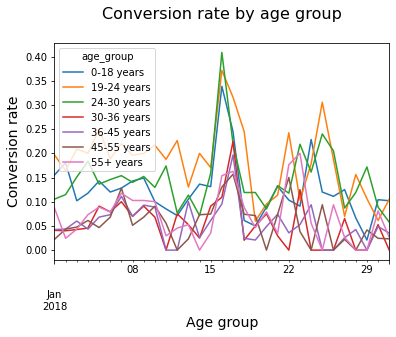

In [32]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

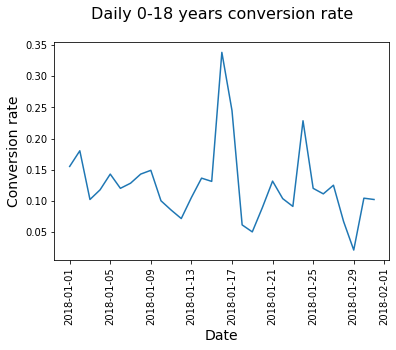

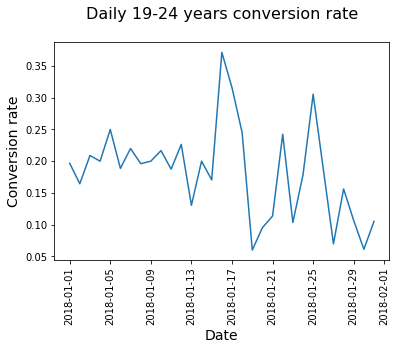

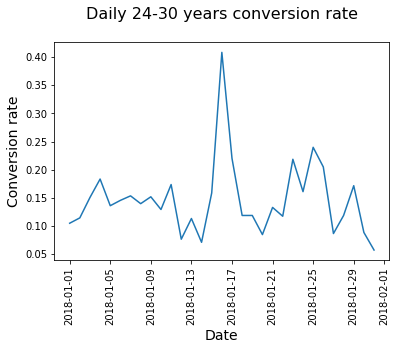

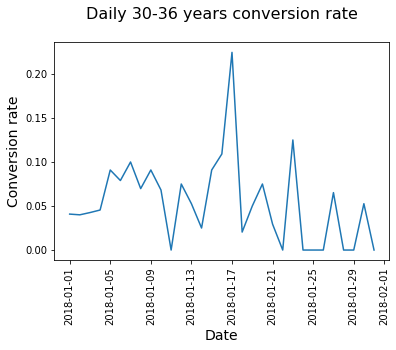

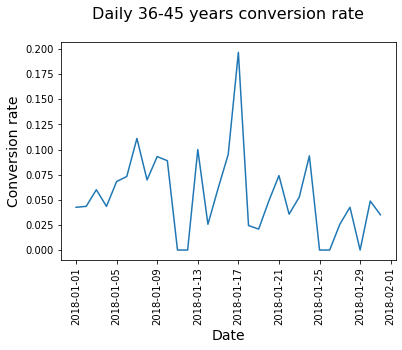

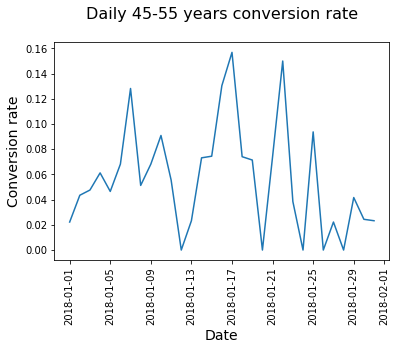

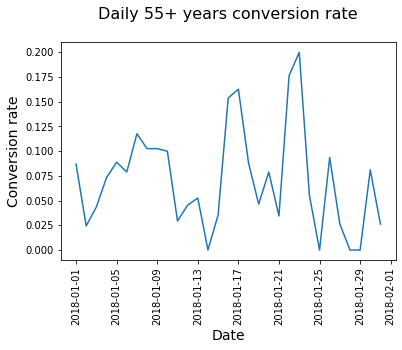

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot the results
plotting_conv(age_group_df)

#### Identifying inconsistencies
#### Day of week trends

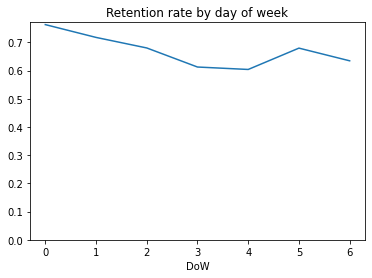

In [34]:
# Add a Day of Week column
marketing['DoW'] = marketing.date_subscribed.dt.dayofweek

#Day of the week trends
DoW_retention = retention_rate(marketing, ['DoW'])

# Plot retention by day of week
DoW_retention.plot()
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()


there does appear to be some relationship where retention is lower if users subscribe later in the week, but this difference is small and is likely indicative of something else, such as sending more emails on the weekend which converts lower intent users. 
#### Conversion rate by date served and channel

In [35]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing,['date_served','marketing_channel'])
daily_conv_channel.head()

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64

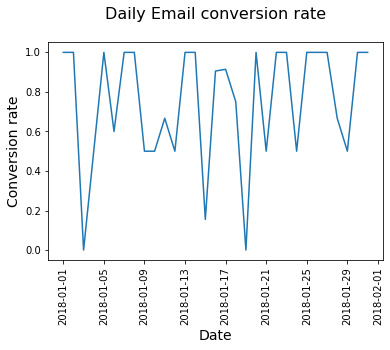

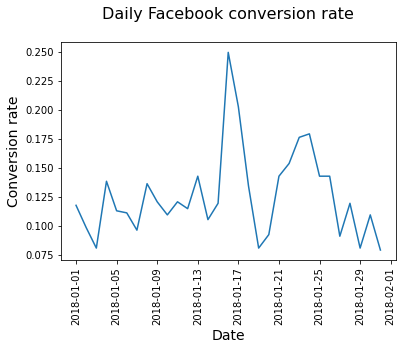

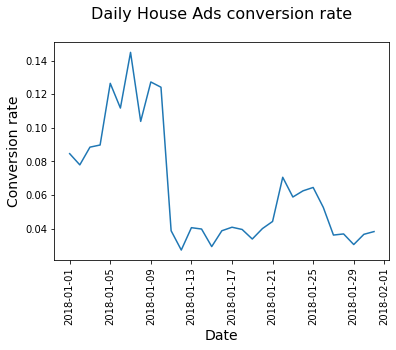

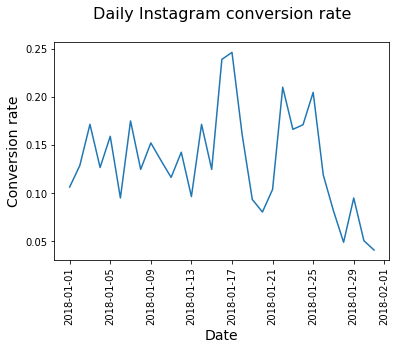

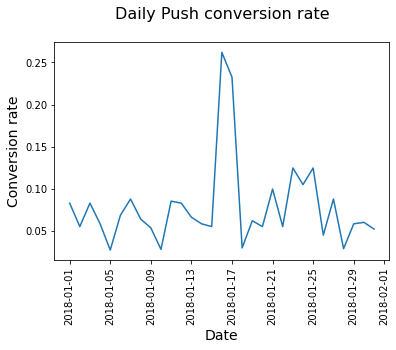

<Figure size 432x288 with 0 Axes>

In [36]:
# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

#### Analyzing House ads conversion rate
House ads conversion has been down since January 11, let's try to identify potential causes for the decrease

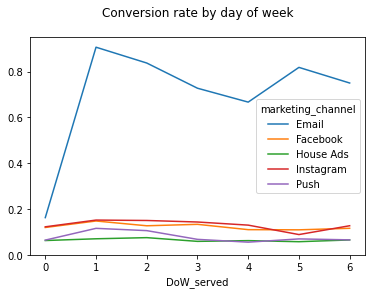

In [37]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served','marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

As you can see, email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. 

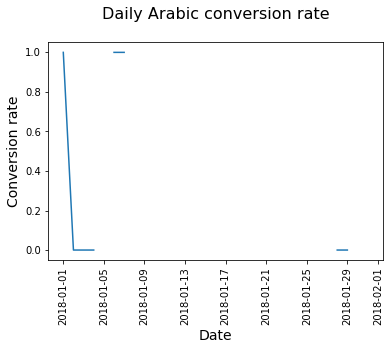

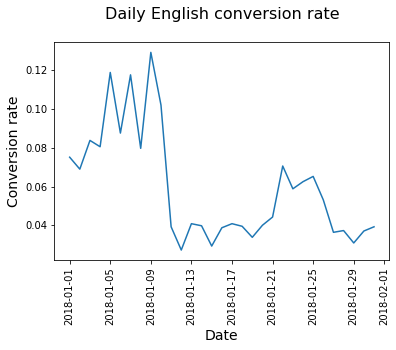

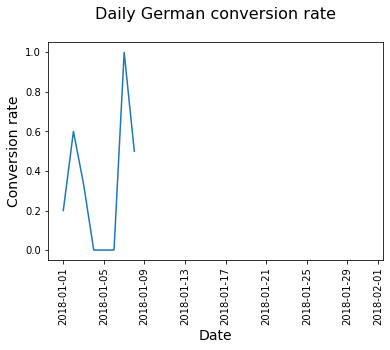

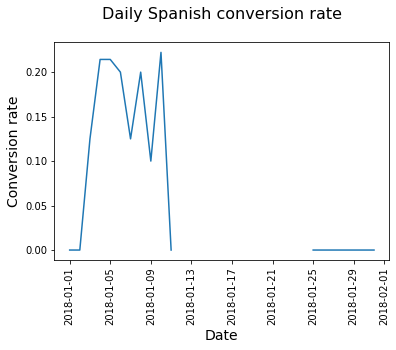

<Figure size 432x288 with 0 Axes>

In [38]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. 

In [39]:
import numpy as np
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

language_check_df

/var/folders/48/kshcls710bv2dlds_cd1v6480000gp/T/ipykernel_58445/261167240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


let's calculate what percentage of users were not being served ads in the right language 

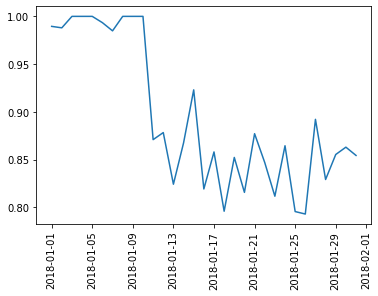

In [40]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation=90)
plt.show()

house ads have been underperforming due to serving all ads in English rather than each user's preferred language. It appears that the problem was that users were seeing ads in languages other than there preferred language. In this lesson, we'll assess the impact of this mistake.
#### Assessing impact
One way to assess impact is to index all other languages' conversion rates to English during the period where the ads were running in the correct language for each user. We then divide the conversion rate of all other languages by the conversion rate of English in order to understand the relative relationship of how well our marketing assets typically convert users for each language compared to English.

In [41]:
# Calculate pre-error conversion rate
# Bug arose sometime around '2018-01-11'
house_ads_no_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_no_bug,['language_displayed']) 

# Index other language conversion rate against Englishs
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


What these indexes mean is that Spanish-speaking users typically convert 1.7 times the rate of English-speakers and Arabic and German speakers convert at about 4-5 times the rate compared to English-speakers.
Next, we calculate the total number of users and actual conversions on each day. 
#### Daily conversions


In [42]:
# Create actual conversion DataFrame
language_conversion = house_ads.groupby(['date_served','language_preferred']).agg({'user_id':'nunique','converted':'sum'})
expected_conversion = pd.DataFrame(language_conversion.unstack(level=1))
expected_conversion.head()


user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

#### Calculating daily expected conversion rate

In [43]:
# Create English conversion rate column for affected period
expected_conversion['actual_english_rate'] =expected_conversion.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
expected_conversion['expected_spanish_rate'] =expected_conversion['actual_english_rate']*spanish_index
expected_conversion['expected_arabic_rate'] =expected_conversion['actual_english_rate']*arabic_index
expected_conversion['expected_german_rate'] = expected_conversion['actual_english_rate']*german_index


Calculating daily expected conversions

In [44]:
# Multiply number of users by the expected conversion rate
expected_conversion['expected_spanish_conv'] = expected_conversion[('user_id','Spanish')]*expected_conversion['expected_spanish_rate']/100
expected_conversion['expected_arabic_conv'] = expected_conversion[('user_id','Arabic')]*expected_conversion['expected_arabic_rate']/100
expected_conversion['expected_german_conv'] = expected_conversion['expected_german_rate']*expected_conversion[('user_id','German')]/100

### Assessing bug impact
It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language.

In [45]:
# Slice only the relevant dates
expected_conversion = expected_conversion.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = expected_conversion['expected_spanish_conv'].sum() + expected_conversion['expected_arabic_conv'].sum() + expected_conversion['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = expected_conversion[('converted', 'Spanish')].sum() + expected_conversion[('converted', 'Arabic')].sum() + expected_conversion[('converted', 'German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs-actual_subs
lost_subs


32.144143192488265

 32 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets.

### A/B test
 A/B test that was run where half the emails were generic upsells to our product while the other half contained personalized messaging around individual usage of our site. 
 Before we can begin assessing the impact of the test, we must ensure the test was executed correctly. The variant column contains the group each user was allocated to. We can do so by looking at how many people were allocated to the control and personalization variants.
 #### Setting up our data to evaluate the test

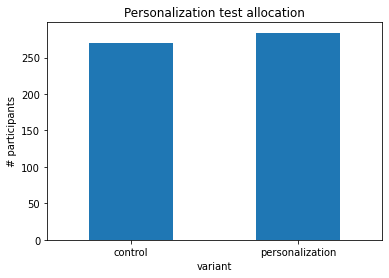

In [46]:
email = marketing[marketing['marketing_channel'] == 'Email']
allocation = email.groupby(['variant'])['user_id'].nunique()
allocation.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xticks(rotation = 0)
plt.ylabel('# participants')
plt.show()


Allocation is relatively even, but not exactly the same.
First, we ensure each user and variant has only one subscription outcome.We use the max() method on the 'converted' column since it's a boolean, and if there are multiple rows with False and True values, we want to consider the row where the user was converted, that is, True.

In [47]:
# Group by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
subscribers

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


### Comparing conversion rates
Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. 

In [48]:
# Drop missing values from the control column
control = subscribers['control'].dropna()
# Drop missing values from the personalization column
personalization = subscribers['personalization'].dropna()

print("Control conversion rate:",np.mean(control))
print("Personalization conversion rate:",np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


Personalization converted users at a higher rate than the control. Is this difference significant?

#### Calculating lift
Lift is calculated by taking the difference between the treatment conversion rate and the control conversion rate divided by the control conversion rate. 

In [49]:
def lift(control,personalization):
    # Calcuate the mean of a and b 
    a_mean = np.mean(control)
    b_mean = np.mean(personalization)
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
    return str(round(lift*100, 2)) + '%'

lift(control,personalization)

'38.85%'

This is an improvement and a good signal that we should consider running personalized emails again in the future.

### T-test


In [50]:
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
t

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)

As p-val<5% we can say that difference in conversion rates is statistically significant.
### Segmentation
#### Personalization test segmented by language

In [51]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control,personalization)) 
      print('t-statistic:', ttest_ind(control,personalization), '\n\n')

In [52]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [53]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




A personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.